# Importing matplotlib and numpy

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Creating a simple range

In [3]:
x = np.arange(-5, 5, 0.01)

# Plotting using a numpy function

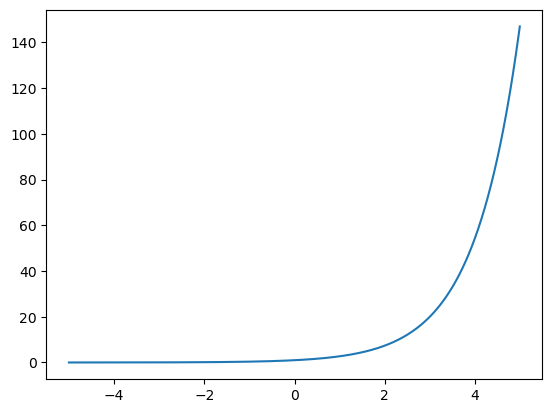

In [5]:
plt.plot(x, np.exp(x))

# Plotting multiple plots in a single figure

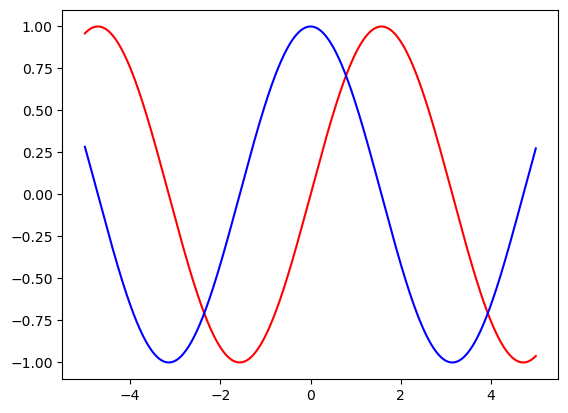

In [6]:
plt.plot(x, np.sin(x), color="red")
plt.plot(x, np.cos(x), color="blue")

# Separating axes from plot

In [17]:
x = np.linspace(-10, 10, 10000)

In [25]:
def Gauss(x, m, s, A):
    return A*np.exp(-(x-m)**2/s**2)

def norm_Gauss(x, m, s):
    return Gauss(x, m, s, A=1.0/(s*np.sqrt(2*np.pi)))

In [44]:
plt.rcParams['text.usetex'] = True

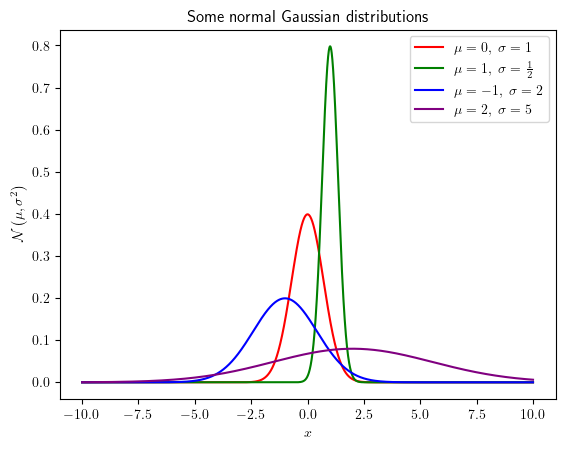

In [60]:
fig, ax = plt.subplots()
ax.plot(x, norm_Gauss(x, 0, 1), color="red", label=r"$\mu=0,\ \sigma=1$")
ax.plot(x, norm_Gauss(x, 1, 0.5), color="green", label=r"$\mu=1,\ \sigma=\frac{1}{2}$")
ax.plot(x, norm_Gauss(x, -1, 2), color="blue", label=r"$\mu=-1,\ \sigma=2$")
ax.plot(x, norm_Gauss(x, 2, 5), color="purple", label=r"$\mu=2,\ \sigma=5$")
ax.set_title(r"Some normal Gaussian distributions")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\mathcal{N}\left(\mu, \sigma^{2}\right)$")
ax.legend()

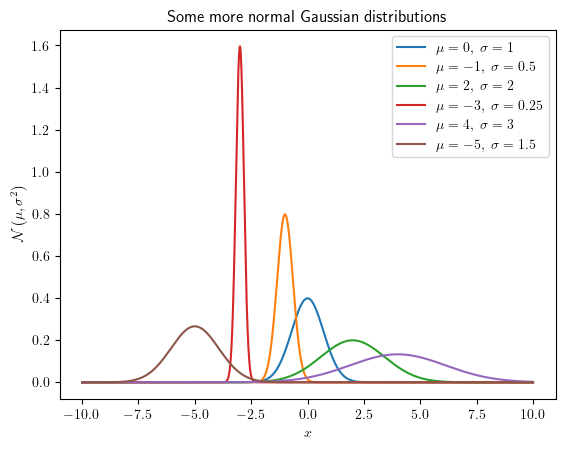

In [62]:
fig, ax = plt.subplots()

ms = [0, -1, 2, -3, 4, -5]
sgs = [1, 0.5, 2, 0.25, 3, 1.5]
for mu, sigma in zip(ms, sgs):
    ax.plot(x, norm_Gauss(x, mu, sigma), label=rf"$\mu={mu},\ \sigma={sigma}$")
    
ax.set_title(r"Some more normal Gaussian distributions")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\mathcal{N}\left(\mu, \sigma^{2}\right)$")
ax.legend()